In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

In [2]:
fraud=pd.read_csv("C:/Users/DELL/Downloads/assignment/Random_Forests/Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud.duplicated().sum()

0

# Creating Dummies

In [8]:
fraud = pd.get_dummies(fraud, columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [9]:
fraud["Taxable.Income"].max()

99619

# Creating new column TaxInc by dividing " Taxable.Income" on the basis of <= 30,000 as risky and good

In [10]:
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [0,30000,99620], labels = ["Risky", "Good"])
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [11]:
fraud[fraud["TaxInc"]=="Risky"]

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
10,29732,102602,19,0,0,1,1,Risky
12,11794,148033,14,0,0,0,1,Risky
16,24987,34551,29,1,0,0,0,Risky
19,10987,126953,30,0,0,1,1,Risky
21,14310,29106,7,1,0,0,1,Risky
...,...,...,...,...,...,...,...,...
544,29916,133877,21,0,0,1,1,Risky
557,12810,157421,10,1,1,0,0,Risky
567,16316,129912,30,1,0,1,0,Risky
575,10735,95975,13,0,0,0,1,Risky


In [12]:
risky=fraud[fraud["Taxable.Income"]<=30000]
risky

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
10,29732,102602,19,0,0,1,1,Risky
12,11794,148033,14,0,0,0,1,Risky
16,24987,34551,29,1,0,0,0,Risky
19,10987,126953,30,0,0,1,1,Risky
21,14310,29106,7,1,0,0,1,Risky
...,...,...,...,...,...,...,...,...
544,29916,133877,21,0,0,1,1,Risky
557,12810,157421,10,1,1,0,0,Risky
567,16316,129912,30,1,0,1,0,Risky
575,10735,95975,13,0,0,0,1,Risky


In [13]:
risky.TaxInc.value_counts()

Risky    124
Good       0
Name: TaxInc, dtype: int64

# Renaming Columns

<Axes: >

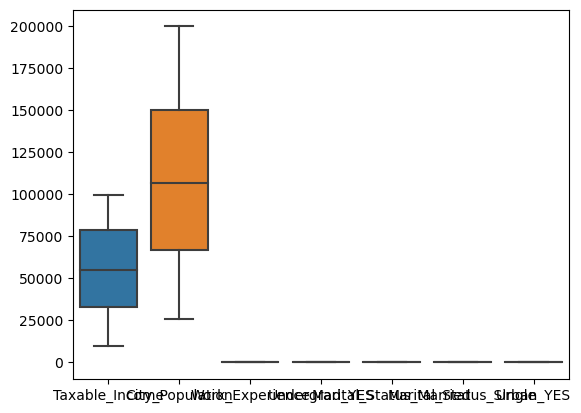

In [16]:

fraud.columns=["Taxable_Income","City_Population","Work_Experience","Undergrad_YES","Marital_Status_Married","Marital_Status_Single","Urban_YES","TaxInc"]
fraud.head()
sns.boxplot(data=fraud)


# EDA

<Axes: >

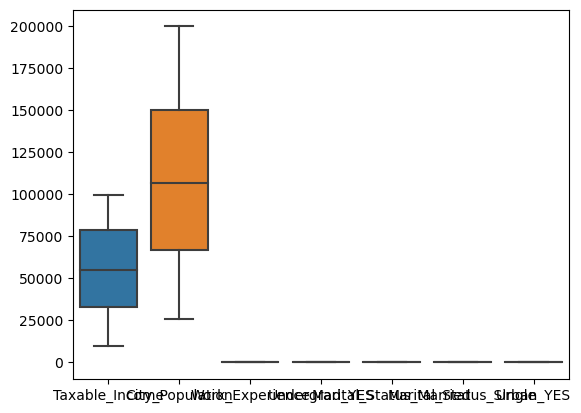

In [17]:
sns.boxplot(data=fraud)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16360\3763716165.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = fraud.corr()


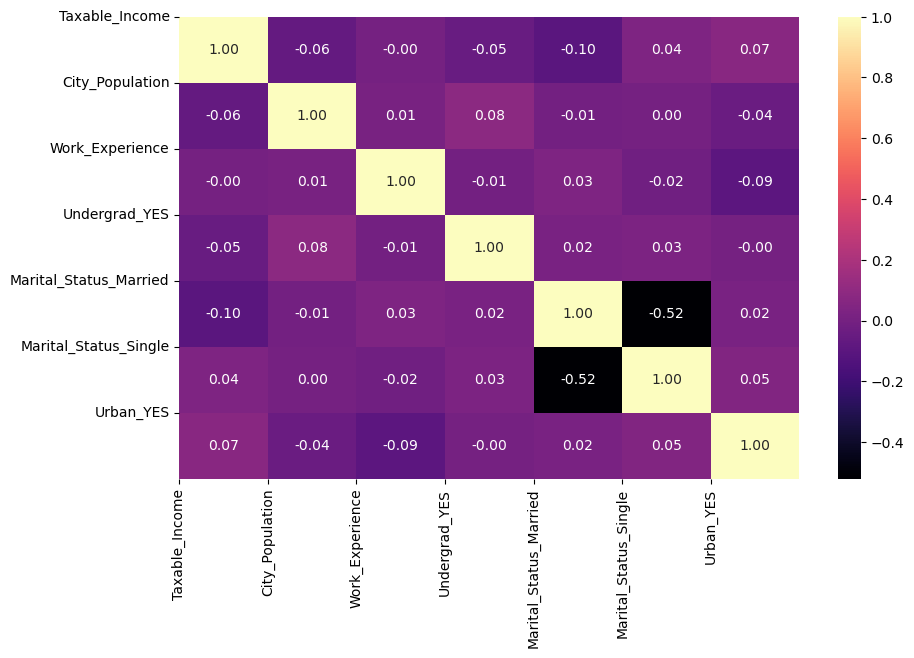

In [18]:
corr = fraud.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

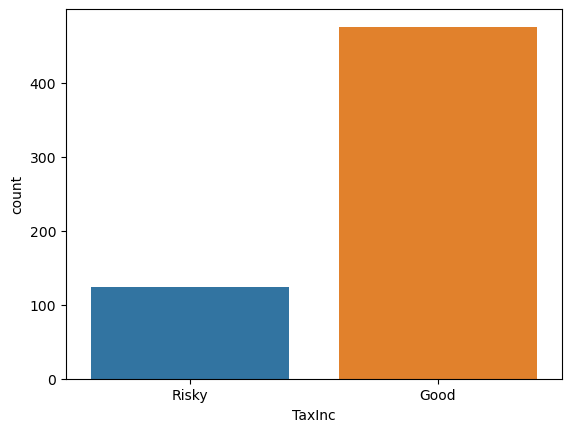

Good     476
Risky    124
Name: TaxInc, dtype: int64


In [21]:


sns.countplot(data=fraud, x='TaxInc')
plt.show()
print(fraud['TaxInc'].value_counts())


# Label encoder on TaxInc

In [22]:
label_encoder = preprocessing.LabelEncoder()
fraud['TaxInc'] = label_encoder.fit_transform(fraud['TaxInc'])

In [23]:
fraud.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,0
1,33700,134075,18,1,0,0,1,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,0,1,1,0
4,81002,27533,28,0,1,0,0,0


In [24]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable_Income          600 non-null    int64
 1   City_Population         600 non-null    int64
 2   Work_Experience         600 non-null    int64
 3   Undergrad_YES           600 non-null    uint8
 4   Marital_Status_Married  600 non-null    uint8
 5   Marital_Status_Single   600 non-null    uint8
 6   Urban_YES               600 non-null    uint8
 7   TaxInc                  600 non-null    int32
dtypes: int32(1), int64(3), uint8(4)
memory usage: 18.9 KB


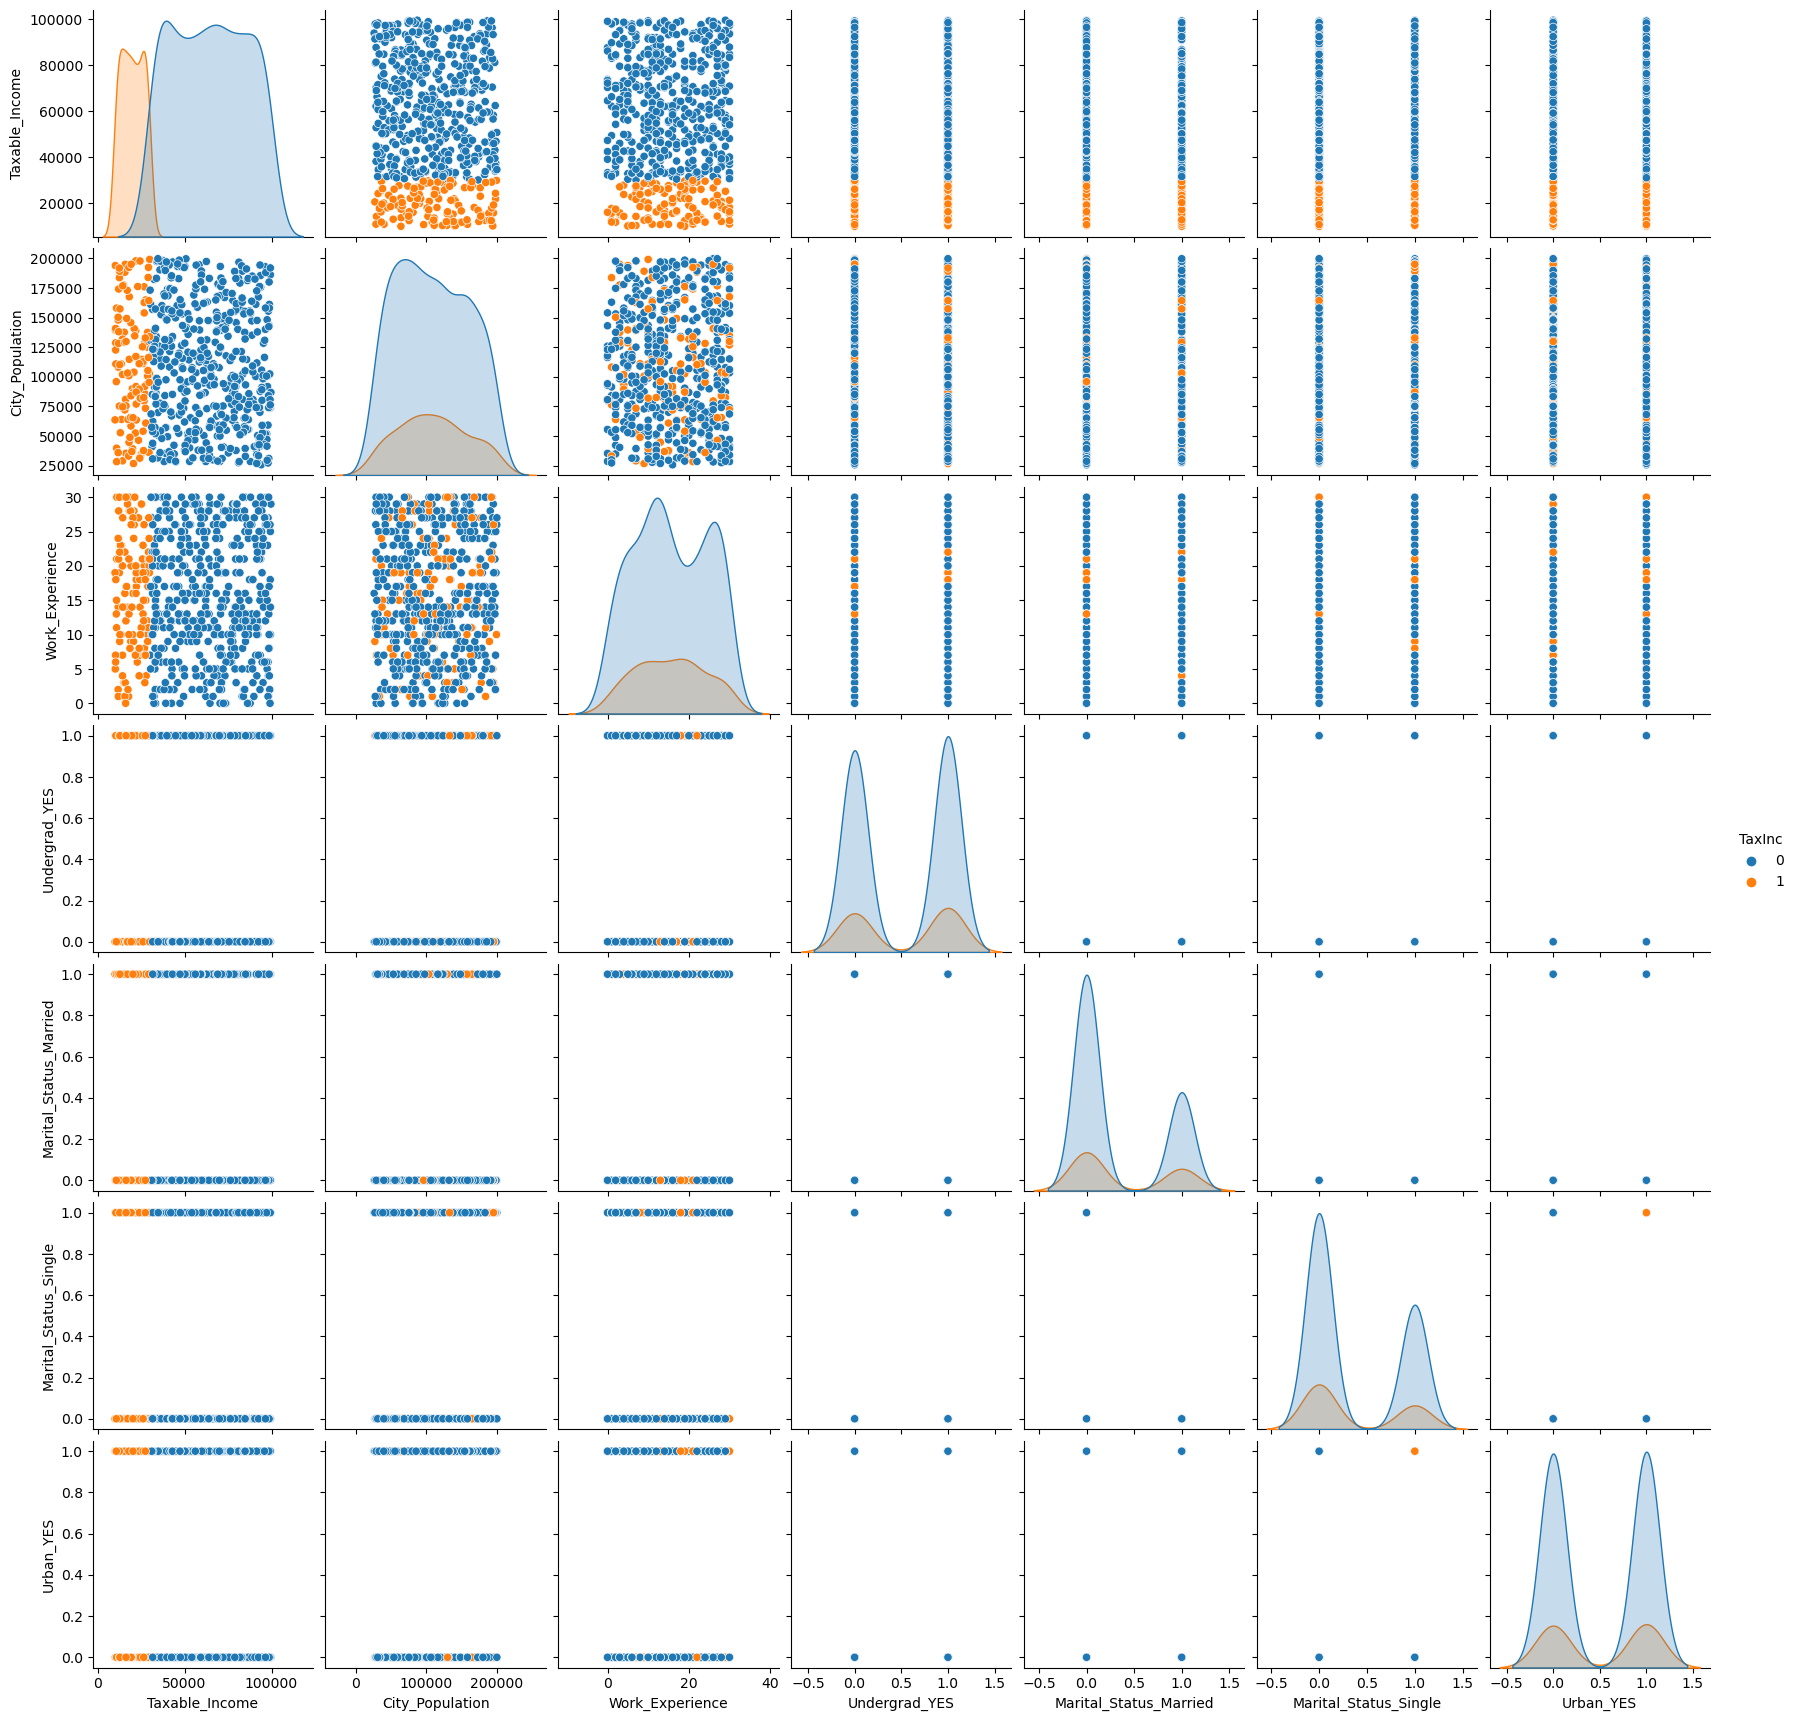

In [25]:
sns.pairplot(fraud,hue='TaxInc')

In [26]:
# Dividing data into independent variables and dependent variable
X = fraud.drop('TaxInc', axis = 1)
print(X)
Y = fraud['TaxInc']
print(Y)

     Taxable_Income  City_Population  Work_Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital_Status_Married  Marital_Status_Single  Urban_YES  
0                         0                      1          1  
1      

In [27]:
# Splitting data into Test & Train
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 7), (120, 7), (480,), (120,))

# Model Building

In [28]:
model=RandomForestClassifier(n_estimators=100,max_features=3)

In [29]:
result=cross_val_score(model,X,Y,cv=10)
print(result.mean())

0.9983333333333334


In [30]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [31]:
preds = model.predict(x_test)
print(preds)
print(pd.Series(preds).value_counts())

[1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 1]
0    94
1    26
dtype: int64


In [32]:
model.score(x_test, y_test)

1.0

In [33]:
preds_train = model.predict(x_train)
print(preds_train)
print(pd.Series(preds_train).value_counts())

[0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0]
0    382
1     98
dtype: i

In [34]:
model.score(x_train, y_train)

1.0

In [35]:
y_pred_df=pd.DataFrame({'actual':y_test,'Prediction':preds})
y_pred_df

,actual,Prediction
110,1,1
419,0,0
565,0,0
77,0,0
181,1,1
...,...,...
399,0,0
340,0,0
148,0,0
494,0,0


In [36]:
y_pred_df['Correct']=y_pred_df['actual']==y_pred_df['Prediction']
display(y_pred_df)

,actual,Prediction,Correct
110,1,1,True
419,0,0,True
565,0,0,True
77,0,0,True
181,1,1,True
...,...,...,...
399,0,0,True
340,0,0,True
148,0,0,True
494,0,0,True


In [37]:
y_pred_df['Correct'].value_counts()

True    120
Name: Correct, dtype: int64

In [38]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [39]:
print(classification_report(y_train,preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

